In [9]:

# Default locations if parameter not passed
benchmark_data_path = "big_matrix.pkl"


In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
from rich import print as rprint
import seaborn as sns
import os
from scipy.stats import bootstrap

benchmark_data = pickle.load(open(benchmark_data_path, "rb"))

df = pd.DataFrame(benchmark_data["dataframe"])


rprint(df.columns)
rprint(df.head())
rprint(df.tail())

Index(['name', 'node_count', 'hosts', 'biggest_matrix', 'full_output',
       'simu_rr', 'time'],
      dtype='object')

name  node_count                                            hosts  \
0  big-matrix           4  sorgan-cpu1,sorgan-cpu2,sorgan-cpu3,sorgan-cpu4   

   biggest_matrix  full_output  simu_rr       time  
0             NaN          NaN      NaN  55.395855

name  node_count                                            hosts  \
0  big-matrix           4  sorgan-cpu1,sorgan-cpu2,sorgan-cpu3,sorgan-cpu4   

   biggest_matrix  full_output  simu_rr       time  
0             NaN          NaN      NaN  55.395855

In [11]:
sns.set_theme()

colors = [
    "#7f7f7f",  # grey
    "#621dac",  # main purple
    "#c5702d",  # orange
    "#000000",  # black,
    "#099892",  # teal
    "#ffd400",  # yellow
    "#7e57c4",  # pink/purple,
]
colors_backup = colors.copy()

In [12]:
def calculate_bootstrap_error(data):
    n_runs = benchmark_data["config"].metadata.runs
    if n_runs < 2:
        return 0
    res = bootstrap(
        (data,), np.mean, confidence_level=0.95, n_resamples=1000, method="basic"
    )
    return res.standard_error

In [13]:
bench_names = df["name"].unique()
run_metadata = benchmark_data["config"].applications

max_node_count = 0

for bench in bench_names:
    bench_metadata = run_metadata[bench]
    n_runs = benchmark_data["config"].metadata.runs
    print(f"Benchmark: {bench} - Runs: {n_runs}")
    # print(bench_metadata)
    df_bench = df[df["name"] == bench]
    for idx, row in df_bench.iterrows():
        print(f"--- Row {idx} ---")
        if "node_count" in row:
            node_count = row["node_count"]
            if node_count > max_node_count:
                max_node_count = node_count
        for col, val in row.items():
            print(f"{col}: {val}")   # printing val directly never truncates
        print()

max_node_count = int(max_node_count)
print(f"Max node count: {max_node_count}")

Benchmark: big-matrix - Runs: 1
--- Row 0 ---
name: big-matrix
node_count: 4
hosts: sorgan-cpu1,sorgan-cpu2,sorgan-cpu3,sorgan-cpu4
biggest_matrix: nan
full_output: nan
simu_rr: nan
time: 55.39585513295606

Max node count: 4


# Experiment 1
x-axis: SIM_RR
y_axis: distance 

In [14]:
import re
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

def extract_distance(text):
    matches = re.findall(
        r"Distance\s*:\s*([-+]?(?:\d*\.\d+|\d+)(?:[eE][-+]?\d+)?)",
        str(text)
    )
    return float(matches[-1]) if matches else np.nan

In [15]:
df_dist = df[df["name"] == "simulator-matrix-feed"].copy()
df_dist["distance"] = df_dist["full_output"].apply(extract_distance)
df_dist = df_dist[["simu_rr", "distance"]]

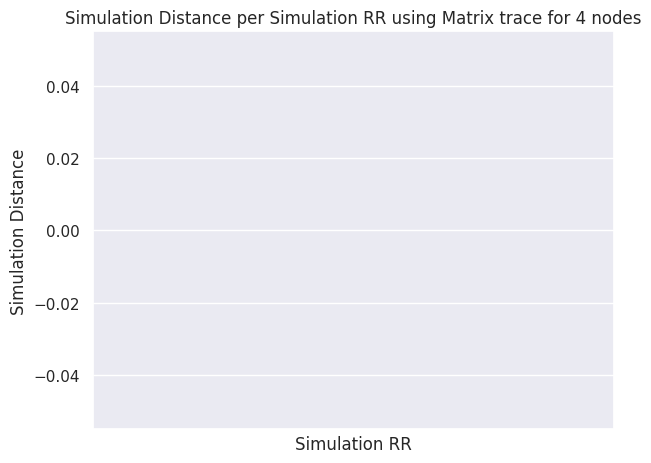

In [16]:
plt.figure()
sns.lineplot(
  data=df_dist,
  x="simu_rr",
  y="distance",
  marker="o",
  errorbar="ci",
)

plt.xlabel("Simulation RR")
plt.ylabel("Simulation Distance")
plt.title(f"Simulation Distance per Simulation RR using Matrix trace for {max_node_count} nodes")
plt.grid(True)
plt.xticks(sorted(df_dist["simu_rr"].unique()))
plt.tight_layout()
plt.show()